Q3 Parsing JCAMP-JDX files

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


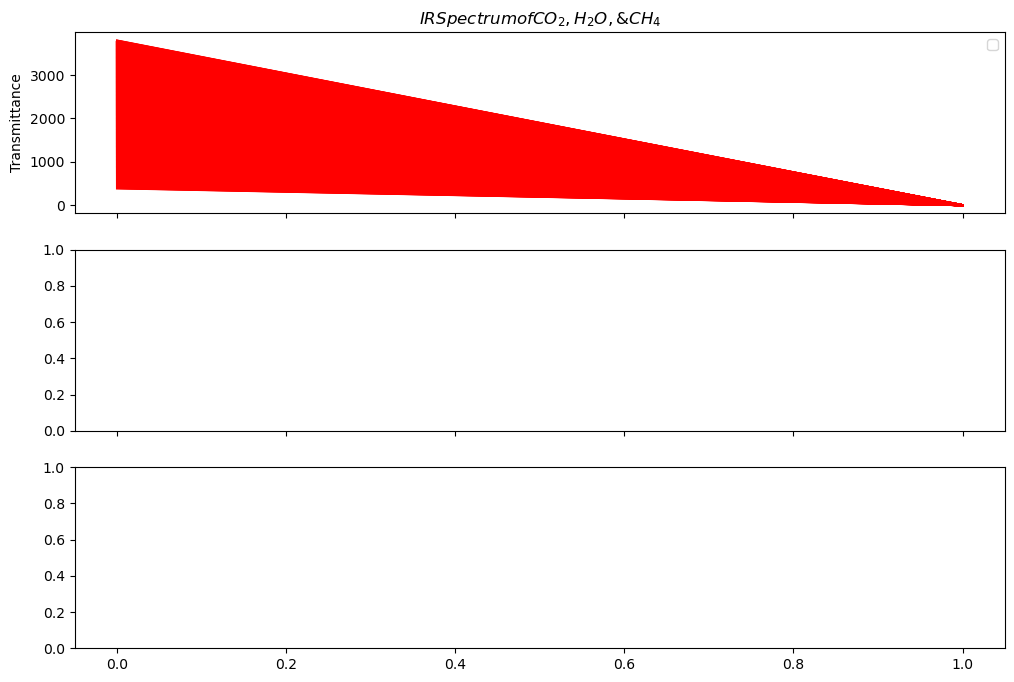

In [32]:
#function that takes a list and averages out indices 1 onward, appending index 0 and the average to a new list, which is returned
def IR_av(lul):
    IR_vals = []
    for i in range(len(lul[0:])):
        lst = []
        xval = lul[i][0]
        lst.append(xval)
        yval = np.sum(lul[i][1:])/(len(lul[i])-1)
        lst.append(yval)
        IR_vals.append(lst)
    return IR_vals

#read JDX format file and return array of IR data
def extract_IR(chem):
    import numpy as np
    import glob
    
    numbers = []
    yvals = []
    xvals = []
    
    #reads the file, splits it by line and adds each row to numbers
    with open(f"{chem}.jdx", 'r') as file:
        data = file.read()
        data = data.split("\n") #data here is a list
        for line in data:
            line = line.strip('#')
            if line == '':
                continue
            if line[0].isdigit():
                numbers.append(line)
                
#after adding to the numbers list, I'll append all the data into lists so it can be used to make the graphs :D
    for row in numbers:
        row = row.split(' ', 5) 
        row = np.array(row) 
        row = row.astype(float) 
        xvals.append(row[0])
        yval = np.sum(row[1:])/(len(row)-1)
        yvals.append(yval)
    
    return xvals, yvals


#time to plot for each compound
import matplotlib as plt
from matplotlib import pyplot as plt

cmpds = ['water', 'carbon_dioxide', 'methane']

fig, axes = plt.subplots(nrows=3, ncols=1,
                         figsize=(12, 8), sharex=True, sharey='row')

axes[0].plot(extract_IR('water'), color='r', label='')
axes[0].set_title(r'$IR Spectrum of CO_2 , H_2 O, & CH_4$')
axes[0].set_ylabel('Transmittance')
#     axes[i].fill_between(extract_IR(cmpds[i]), -2, color='r', alpha=.125)
axes[0].legend(loc='upper right', frameon=True)
    
plt.show()

In [4]:
import os

os.getcwd()

'C:\\Users\\chill\\OneDrive - National University of Singapore\\AY22-23 Sem2\\SP2273'